In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
#loading the dataset into pandas dataframe

df = pd.read_csv('climate_action_data.csv')


In [9]:
#the general data inspection

print("Initial Data Inspection:")
print(f"Dataset shape: {df.shape}")
#the overview of the data's structure
df.info()

Initial Data Inspection:
Dataset shape: (913, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [10]:
df.head(10)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [11]:
# Check for missing values
print("\nMissing values per column/empty cells:")
print(df.isnull().sum())


Missing values per column/empty cells:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [12]:
print(df.dtypes)

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [13]:
#summary statistics
print("descriptive statistics")
print(df.describe())

descriptive statistics
       Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C)  \
count        913         909              913     913            913   
unique       800         798              750     313            170   
top     SEN-1430  2026-09-10            error    7.54           19.1   
freq           2           2                5      11             13   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          913       909                           913   
unique         448         5                           595   
top           56.0     Wheat                          66.9   
freq             8       203                             8   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         913            913  
unique                        243            800  
top                           8.0       IMG-2430  
freq                           11              2  


In [14]:
#checking for missing data
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
908     True
909     True
910     True
911     True
912     True
Length: 913, dtype: bool

In [16]:
#checking for duplicate records
#print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nDuplicate rows:")
    print(duplicates)




Duplicate rows:
    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
800  SEN-1008  2025-01-09            52.08    6.08           22.0        89.3   
802  SEN-1175  2025-06-25            22.21    5.42           23.4        68.4   
803  SEN-1735  2027-01-06             71.4    4.93           24.5        67.0   
804  SEN-1242  2025-08-31            74.04    5.62           25.5        76.9   
805  SEN-1764  2027-02-04            12.35    7.38           27.8        33.4   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2   

    Crop_T

In [17]:
#Cleaning the dataset
#Dropping duplicates and leaving only one instance of the duplicate value
df.drop_duplicates(keep="first", inplace= True)
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [18]:
#checking for non numeric values in numeric columns
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    non_numeric = pd.to_numeric(df[col], errors = 'coerce').isna()
    if non_numeric.any():
     print(f"Non_numeric values in {col}:")
    print(df[non_numeric][['Sensor_ID','Date', col]])

Non_numeric values in Soil_Moisture(%):
    Sensor_ID        Date Soil_Moisture(%)
107  SEN-1107  2025-04-18            error
118  SEN-1118  2025-04-29            error
244  SEN-1244  2025-09-02            error
459  SEN-1459  2026-04-05            error
683  SEN-1683  2026-11-15            error
Non_numeric values in Soil_pH:
    Sensor_ID        Date Soil_pH
107  SEN-1107  2025-04-18   error
118  SEN-1118  2025-04-29   error
244  SEN-1244  2025-09-02   error
459  SEN-1459  2026-04-05   error
683  SEN-1683  2026-11-15   error
Non_numeric values in Temperature(C):
    Sensor_ID        Date Temperature(C)
107  SEN-1107  2025-04-18          error
118  SEN-1118  2025-04-29          error
244  SEN-1244  2025-09-02          error
459  SEN-1459  2026-04-05          error
683  SEN-1683  2026-11-15          error
Non_numeric values in Humidity(%):
    Sensor_ID        Date Humidity(%)
107  SEN-1107  2025-04-18       error
118  SEN-1118  2025-04-29       error
244  SEN-1244  2025-09-02       er

In [19]:
#replacing error values with NaN
df.replace('error', np.nan, inplace=True)

In [20]:
print(df.describe())

       Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C)  \
count        802         798              797     797            797   
unique       800         798              749     312            169   
top     SEN-1449  2025-01-01            77.89    7.54           25.8   
freq           2           1                3       9             11   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          797       798                           797   
unique         447         5                           594   
top           56.0     Wheat                          92.8   
freq             6       172                             5   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         797            802  
unique                        242            800  
top                           8.0       IMG-2449  
freq                           10              2  


In [21]:
# Convert 'Date' column to datetime, coercing errors to NaT (NaN for datetime)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Forward fill missing dates
df['Date'].fillna(method='ffill', inplace=True)

cols_to_convert = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', '', regex=True), errors='coerce')


C:\Users\USER\AppData\Local\Temp\ipykernel_6100\3467769035.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6100\3467769035.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)


In [22]:
# Fill NaN in numeric columns with their respective column means
for col in ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
            'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6100\1123260915.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [23]:
#Explanatory data analysis
#Discriptive statistics again
print("\033[92mDISCRIPTIVE STATISTICS\033[0m")
df.describe()

DISCRIPTIVE STATISTICS


,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,802,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2026-02-05 01:20:47.880299264,44.763726,6.248795,26.460602,60.037265,87.468005,17.392221
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-20 06:00:00,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,2026-02-05 12:00:00,45.230000,6.248795,26.600000,59.850000,85.950000,17.392221
75%,2026-08-23 18:00:00,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460668,1.021572,4.863290,17.415989,34.765375,7.140127


In [24]:
#importing libraries for plotting/ data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Soil Moisture Distribution')

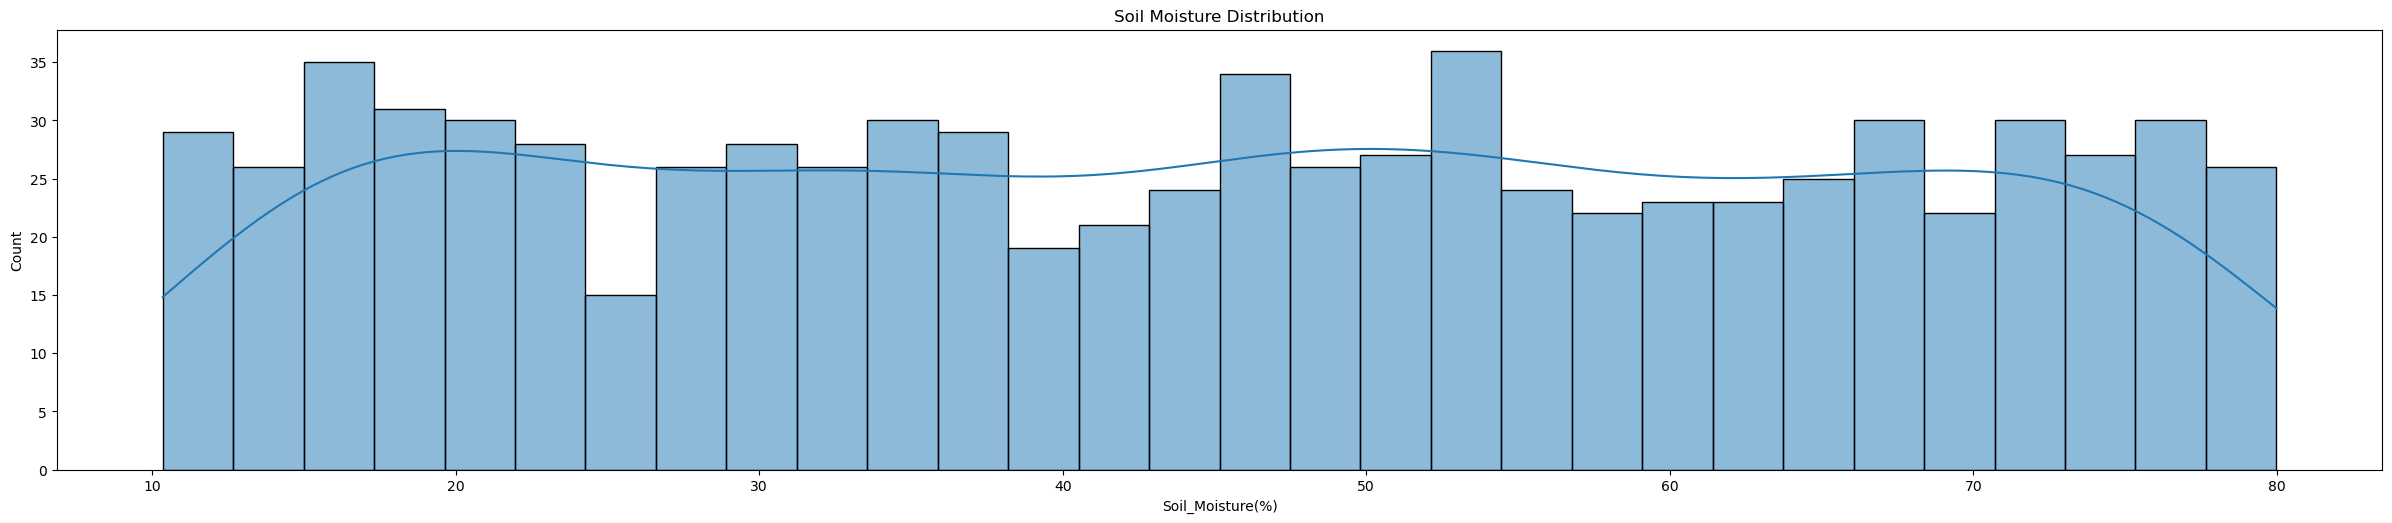

In [25]:
# Visualizing the distribution of numeric variables using histograms
#Setting figure size
plt.figure(figsize=(30, 40))
# Histogram of Soil Moisture
plt.subplot(6, 1, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title('Soil Moisture Distribution')

Text(0.5, 1.0, 'Soil_pH Distribution')

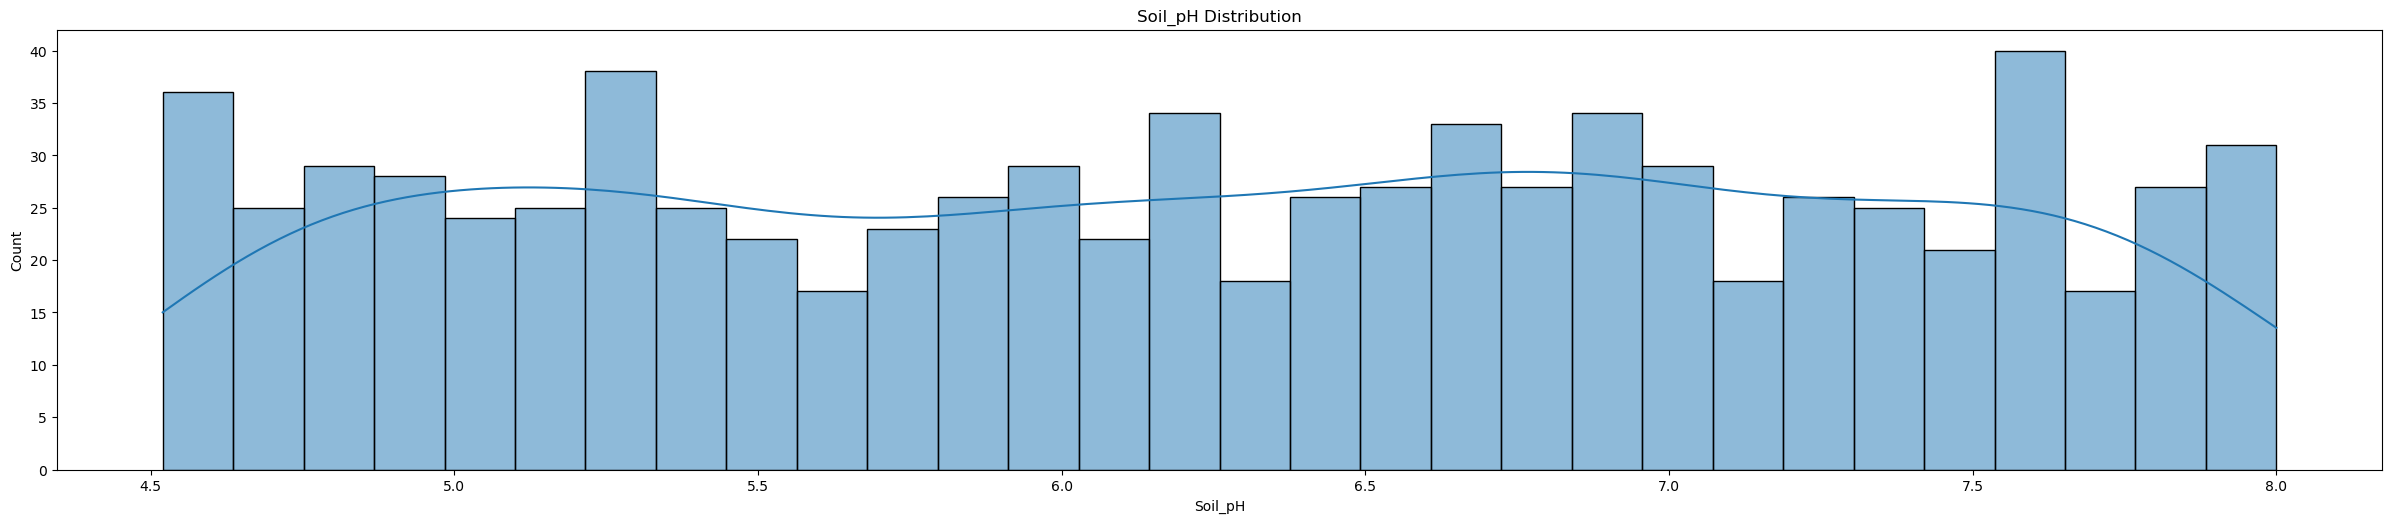

In [26]:
# Histogram of Soil PH
plt.figure(figsize=(30, 40))
plt.subplot(6, 1, 2)
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title('Soil_pH Distribution')

Text(0.5, 1.0, 'Temperature Distribution')

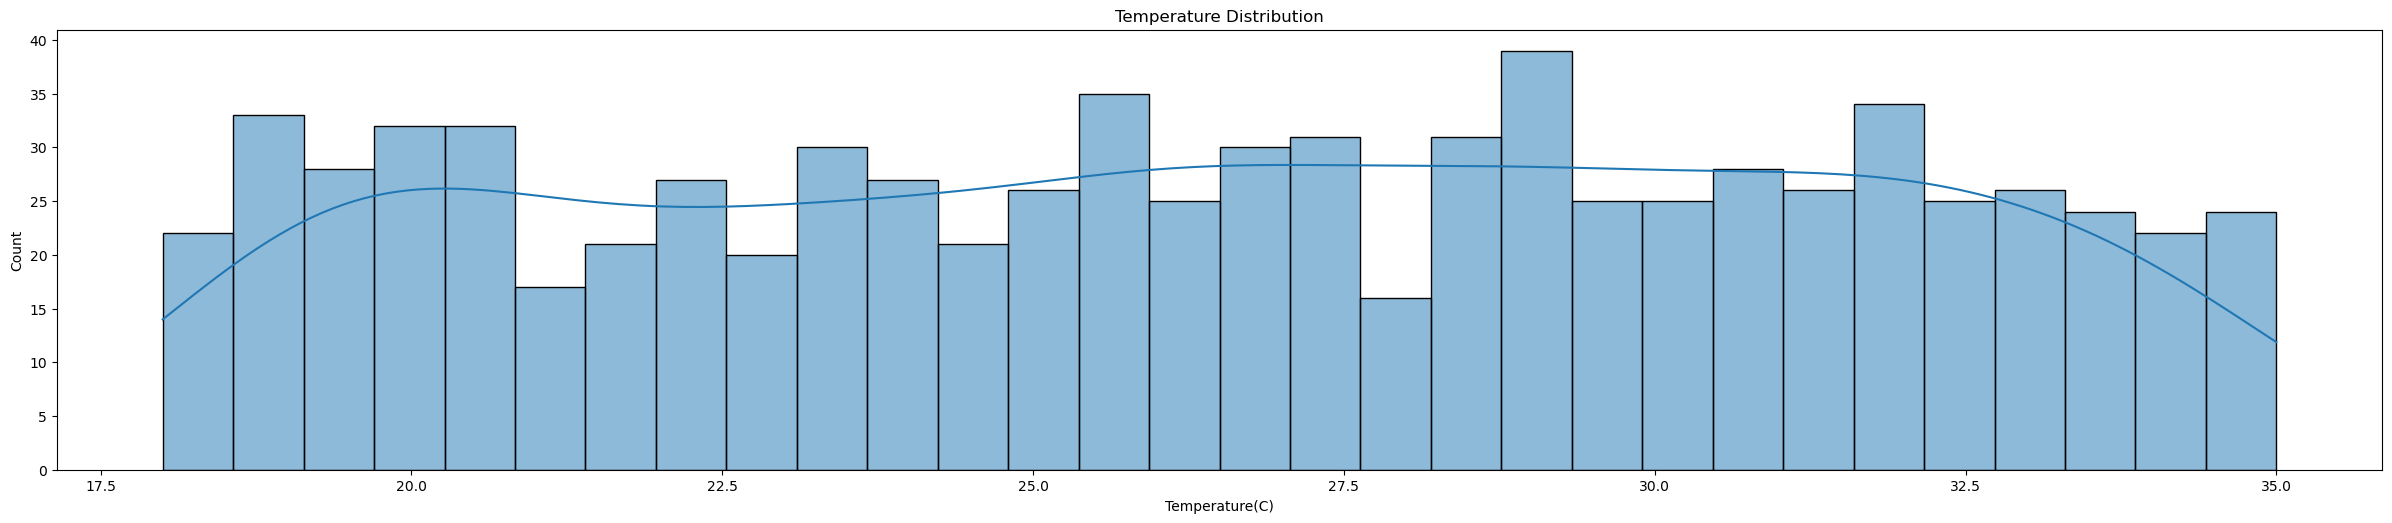

In [27]:
# Histogram of Temperature
plt.figure(figsize=(30, 40))
plt.subplot(6, 1, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title('Temperature Distribution')

Text(0.5, 1.0, 'Humidity Distribution')

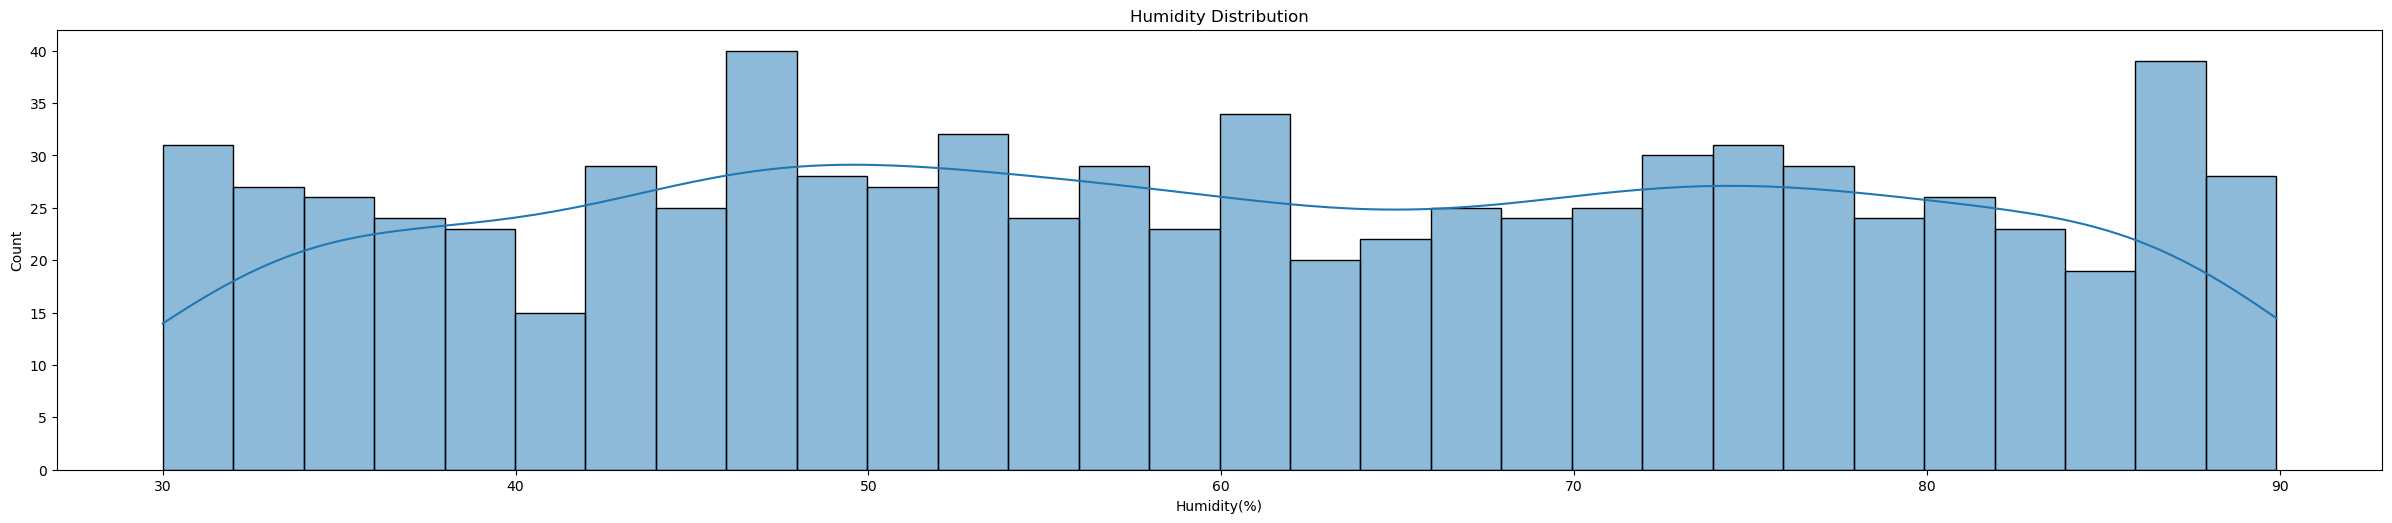

In [28]:
# Histogram of Humidity
plt.figure(figsize=(30, 40))
plt.subplot(6, 1, 4)
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title('Humidity Distribution')


Text(0.5, 1.0, 'Fertilizer_Recommended Distribution')

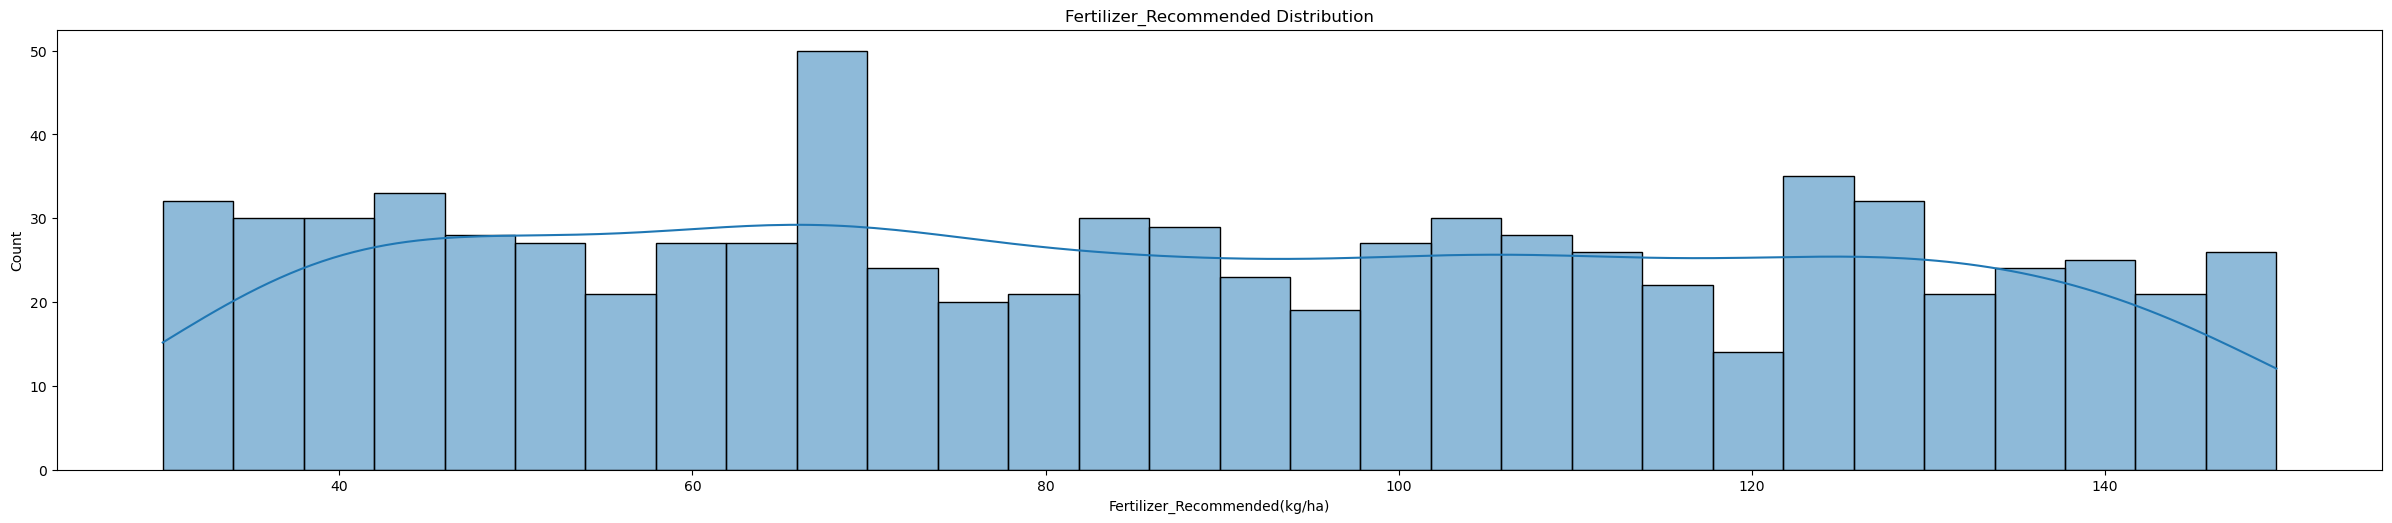

In [29]:
# Histogram of Fertilizer_Recommended(kg/ha)
plt.figure(figsize=(30, 40))
plt.subplot(6, 1, 5)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title('Fertilizer_Recommended Distribution')


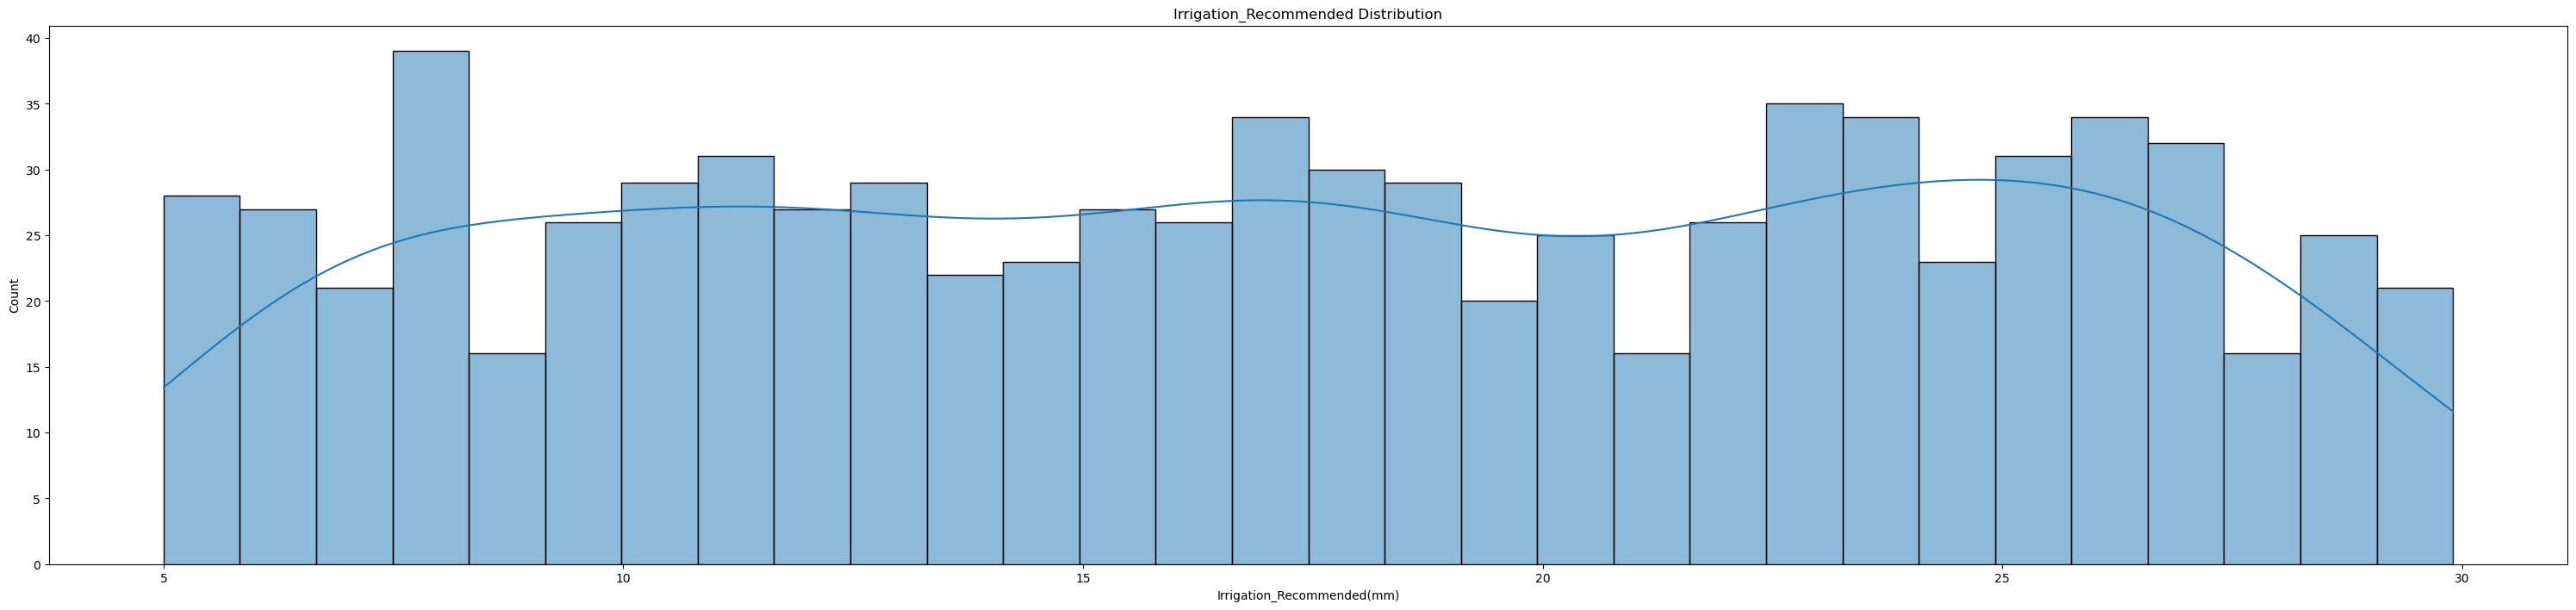

In [30]:
# Histogram of Irrigation_Recommended(mm)
plt.figure(figsize=(30, 40))
plt.subplot(6, 1, 6)
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title('Irrigation_Recommended Distribution')

plt.tight_layout() 

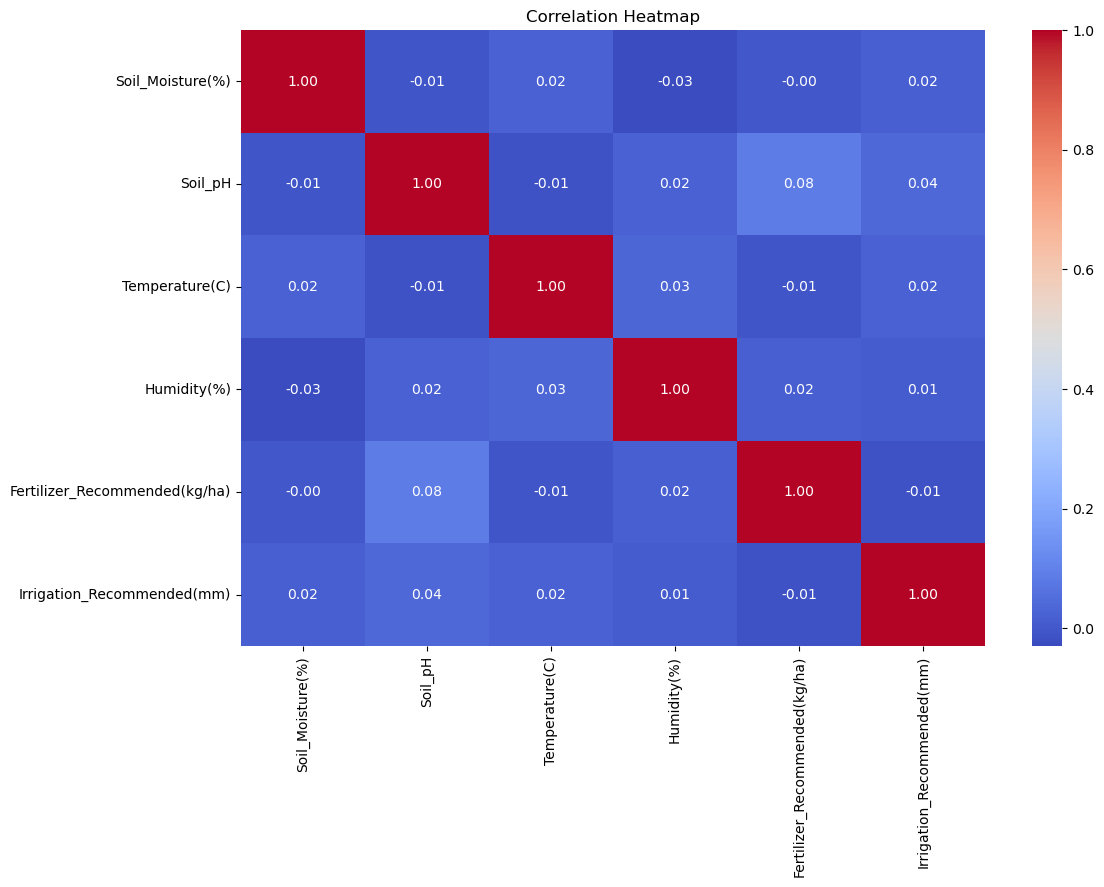

In [31]:
# Creating a correlation heatmap to examine the relationships between soil and environmental variables
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [32]:
corr = df.select_dtypes(include='number').corr()
fert_corr = corr['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print(fert_corr)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083676
Humidity(%)                      0.015300
Soil_Moisture(%)                -0.002757
Temperature(C)                  -0.007206
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [33]:
avg_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("Crop with highest average soil moisture:", avg_moisture.idxmax())
print(avg_moisture)
print(df['Soil_Moisture(%)'].dtype)

Crop with highest average soil moisture: Wheat
Crop_Type
Wheat       47.181591
Maize       44.950863
Beans       44.391603
Tomatoes    43.815439
Lettuce     42.982078
Name: Soil_Moisture(%), dtype: float64
float64


In [34]:
# Filter crops with average temperature > 30°C and calculate average temp + moisture
hot_crops = df[df['Temperature(C)'] > 30].groupby('Crop_Type').agg({
    'Temperature(C)': 'mean',
    'Soil_Moisture(%)': 'mean'
}).sort_values(by='Temperature(C)', ascending=False)

# Add irrigation adjustment suggestions
def suggest_irrigation(moisture):
    if moisture < 30:
        return "Increase irrigation"
    elif 30 <= moisture <= 50:
        return "Maintain current level"
    else:
        return "Reduce irrigation"

hot_crops['irrigation_adjustment'] = hot_crops['Soil_Moisture(%)'].apply(suggest_irrigation)

print(hot_crops)

           Temperature(C)  Soil_Moisture(%)   irrigation_adjustment
Crop_Type                                                          
Lettuce         32.575676         42.661892  Maintain current level
Wheat           32.528571         42.699714  Maintain current level
Maize           32.430909         44.885091  Maintain current level
Tomatoes        32.404348         48.647391  Maintain current level
Beans           32.311538         46.549038  Maintain current level


In [35]:
#putting back the cleaned data in the data frame back to a csv file
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [ ]:
'''
    Insights and Recommendations from Precision Agriculture Data Analysis
    1. Key Factors Influencing Fertilizer Recommendation
        From the correlation analysis, the variables most strongly correlated with Fertilizer_Recommended(kg/ha) are:
            Soil_pH
            Humidity (%)       
            Soil_Moisture(%)
    Recommendation:
        Focus fertilizer recommendations primarily on Soil_pH levels..

    2. Crop with Highest Average Soil Moisture
        Based on grouped means:
            Crop Type: Wheat had the highest average soil moisture among all crops.
    Recommendation:
        Since wheat grows well in water-logged conditions, irrigation practices for wheat fields should continue to maintain higher moisture levels.
'''